Checking column types

Take a look at the UFO dataset's column types using the dtypes attribute. Two columns jump out for transformation: the seconds column, which is a numeric column but is being read in as object, and the date column, which can be transformed into the datetime type. That will make our feature engineering efforts easier later on.

Instructions

* Print out the dtypes of the ufo dataset.
* Change the type of the seconds column by passing the float type into the astype() method.
* Change the type of the date column by passing ufo["date"] into the pd.to_datetime() function.
* Print out the dtypes of the seconds and date columns, to make sure it worked.

In [ ]:
# Check the column types
print(ufo.dtypes)

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype(float)

# Change the date column to type datetime
ufo["date"] = pd.to_datetime(ufo["date"])

# Check the column types
print(ufo[["seconds","date"]].dtypes)

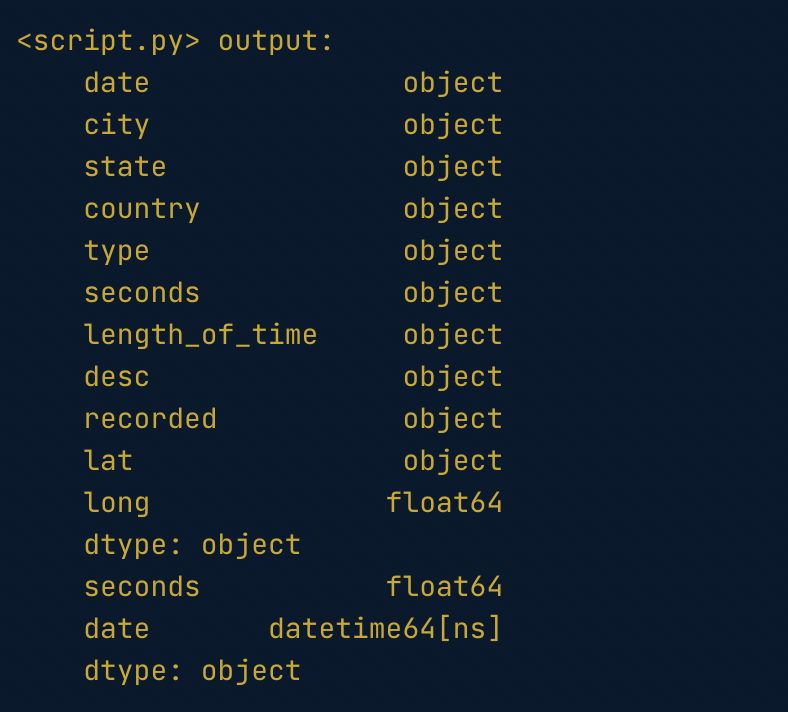

Dropping missing data

Let's remove some of the rows where certain columns have missing values. We're going to look at the length_of_time column, the state column, and the type column. If any of the values in these columns are missing, we're going to drop the rows.

Instructions

+ Check how many values are missing in the length_of_time, state, and type columns, using isnull() to check for nulls and sum() to calculate how many exist.
+ Use boolean indexing to filter out the rows with those missing values, using notnull() to check the column. Here, we can chain together each column we want to check.
+ Print out the shape of the new ufo_no_missing dataset.

In [ ]:
# Check how many values are missing in the length_of_time, state, and type columns
print(ufo[['length_of_time','state', 'type']].isnull().sum())

# Keep only rows where length_of_time, state, and type are not null
ufo_no_missing = ufo[ufo['length_of_time'].notnull() & 
          ufo['state'].notnull() & 
          ufo['type'].notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)

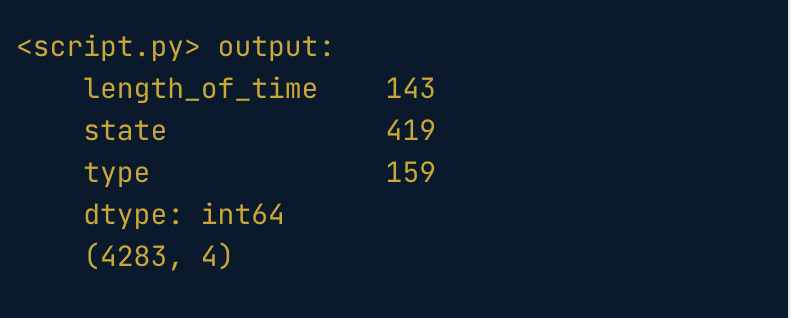

Extracting numbers from strings

The length_of_time field in the UFO dataset is a text field that has the number of minutes within the string. Here, you'll extract that number from that text field using regular expressions.

Instructions

+ Pass \d+ into re.compile() in the pattern variable to designate that we want to grab as many digits as possible from the string.
+ Into re.match(), pass the pattern we just created, as well as the time_string we want to extract from.
+ Use lambda within the apply() method to perform the extraction.
+ Print out the head() of both the length_of_time and minutes columns to compare.

In [ ]:
def return_minutes(time_string):

    # Use \d+ to grab digits
    pattern = re.compile(r"\d+")
    
    # Use match on the pattern and column
    num = re.match(pattern,time_string)
    if num is not None:
        return int(num.group(0))
        
# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(lambda row: return_minutes(row))

# Take a look at the head of both of the columns
print(ufo[["length_of_time","minutes"]].head())

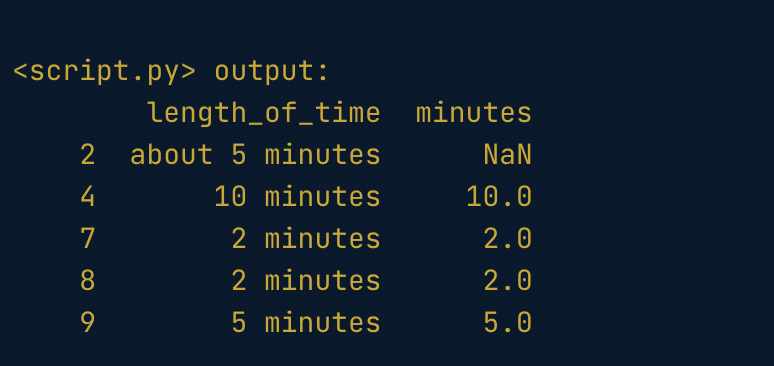

Identifying features for standardization

In this section, you'll investigate the variance of columns in the UFO dataset to determine which features should be standardized. After taking a look at the variances of the seconds and minutes column, you'll see that the variance of the seconds column is extremely high. Because seconds and minutes are related to each other (an issue we'll deal with when we select features for modeling), let's log normlize the seconds column.

Instructions

+ Use the var() method on the seconds and minutes columns to check the variance. Notice how high the variance is on the seconds column.
+ Using np.log() perform log normalization on the seconds column, transforming it into a new column named seconds_log.
+ Print out the variance of the seconds_log column

In [ ]:
# Check the variance of the seconds and minutes columns
print(ufo[["seconds","minutes"]].var())

# Log normalize the seconds column
ufo["seconds_log"] = np.log(ufo["seconds"])

# Print out the variance of just the seconds_log column
print(ufo["seconds_log"].var())

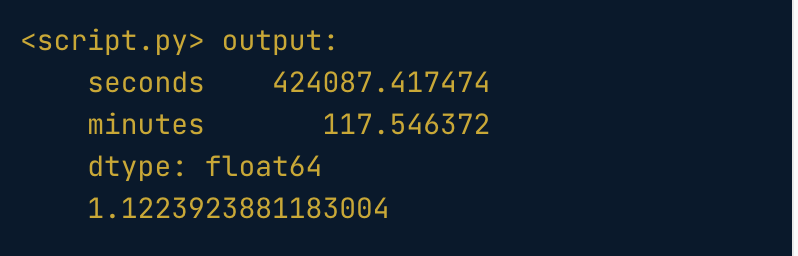

Encoding categorical variables

There are couple of columns in the UFO dataset that need to be encoded before they can be modeled through scikit-learn. You'll do that transformation here, using both binary and one-hot encoding methods.

Instructions

+ Using apply(), write a lambda that returns a 1 if the value is us, else return 0. This is something we learned in Chapter 3 if you need a refresher.
+ Next, print out the number of unique() values of the type column.
Using pd.get_dummies(), create a one-hot encoded set of the type column.
+ Finally, use pd.concat() to concatenate the ufo dataset to the type_set encoded variables.

In [ ]:
# Use Pandas to encode us values as 1 and others as 0
ufo["country_enc"] = ufo["country"].apply(lambda val: 1 if val=="us" else 0)

# Print the number of unique type values
print(len(ufo["type"].unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(ufo["type"])

# Concatenate this set back to the ufo DataFrame
ufo = pd.concat([ufo, type_set], axis=1)

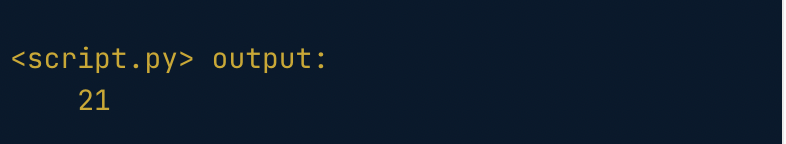

Features from dates

Another feature engineering task to perform is month and year extraction. Perform this task on the date column of the ufo dataset.

Instructions
100 XP
Print out the head() of the date column.
Using apply(), lambda, and the .month attribute, extract the month from the date column.
Using apply(), lambda, and the .year attribute, extract the year from the date column.
Take a look at the head() of the date, month, and year columns.

In [ ]:
# Look at the first 5 rows of the date column
print(ufo["date"].head())

# Extract the month from the date column
ufo["month"] = ufo["date"].apply(lambda row:row.month)

# Extract the year from the date column
ufo["year"] = ufo["date"].apply(lambda row:row.year)

# Take a look at the head of all three columns
print(ufo[["date","month","year"]].head())

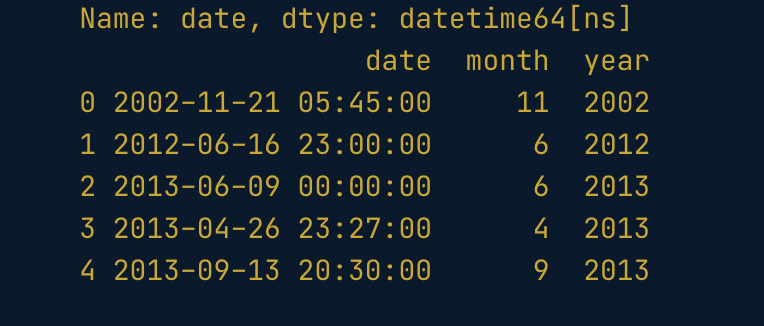

Text vectorization

Let's transform the desc column in the UFO dataset into tf/idf vectors, since there's likely something we can learn from this field.

Instructions

+ Print out the head() of the ufo["desc"] column.
+ Set vec equal to the TfidfVectorizer() object.
+ Use vec's fit_transform() method on the ufo["desc"] column.
+ Print out the shape of the desc_tfidf vector, to take a look at the number of columns this created. The output is in the shape (rows, columns).

In [ ]:
# Take a look at the head of the desc field
print(ufo["desc"].head())

# Create the tfidf vectorizer object
vec = TfidfVectorizer()

# Use vec's fit_transform method on the desc field
desc_tfidf = vec.fit_transform(ufo["desc"])

# Look at the number of columns this creates
print(desc_tfidf.shape)

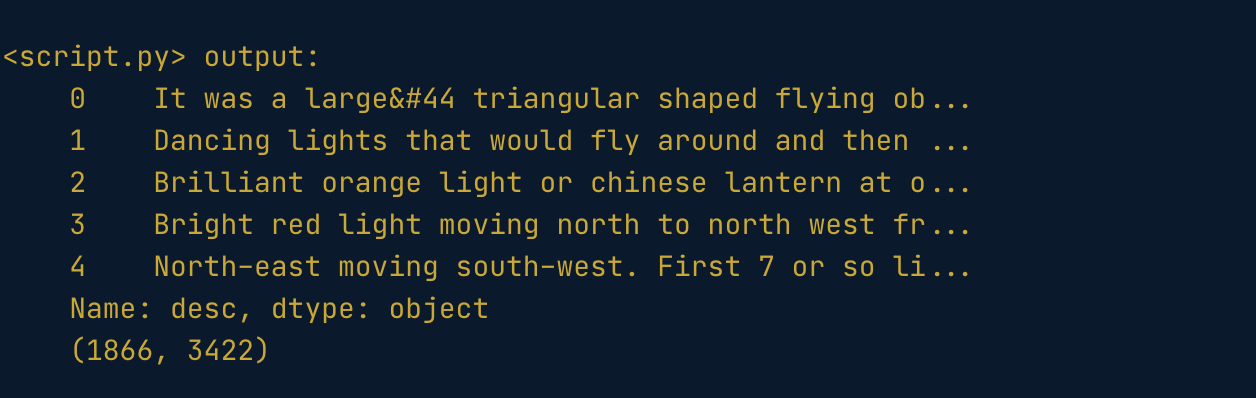

Selecting the ideal dataset

Let's get rid of some of the unnecessary features. Because we have an encoded country column, country_enc, keep it and drop other columns related to location: city, country, lat, long, state.

We have columns related to month and year, so we don't need the date or recorded columns.

We vectorized desc, so we don't need it anymore. For now we'll keep type.

We'll keep seconds_log and drop seconds and minutes.

Let's also get rid of the length_of_time column, which is unnecessary after extracting minutes.

Instructions

+ Use .corr() to run the correlation on seconds, seconds_log, and minutes in the ufo DataFrame.
+ Make a list of columns to drop, in alphabetical order.
+ Use drop() to drop the columns.
+ Use the words_to_filter() function we created previously. Pass in vocab, vec.vocabulary_, desc_tfidf, and let's keep the top 4 words as the last parameter.

In [ ]:
# Check the correlation between the seconds, seconds_log, and minutes columns
print(ufo[["seconds","seconds_log","minutes"]].corr())

# Make a list of features to drop
to_drop = ["city", "country", "date", "desc", "lat", "length_of_time", "long", "minutes", "recorded", "seconds", "state"]

# Drop those features
ufo_dropped = ufo.drop(to_drop, axis=1)

# Let's also filter some words out of the text vector we created
filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

Modeling the UFO dataset, part 1

In this exercise, we're going to build a k-nearest neighbor model to predict which country the UFO sighting took place in. Our X dataset has the log-normalized seconds column, the one-hot encoded type columns, as well as the month and year when the sighting took place. The y labels are the encoded country column, where 1 is us and 0 is ca.

Instructions

+ Print out the .columns of the X set.
+ Split up the X and y sets using train_test_split(). Pass the y set to the stratify= parameter, since we have imbalanced classes here.
+ Use fit() to fit train_X and train_y.
+ Print out the .score() of the knn model on the test_X and test_y sets.

In [ ]:
# Take a look at the features in the X set of data
print(X.columns)

# Split the X and y sets using train_test_split, setting stratify=y
train_X, test_X, train_y, test_y = train_test_split(X,y,stratify=y)

# Fit knn to the training sets
knn.fit(train_X,train_y)

# Print the score of knn on the test sets
print(knn.score(test_X,test_y))

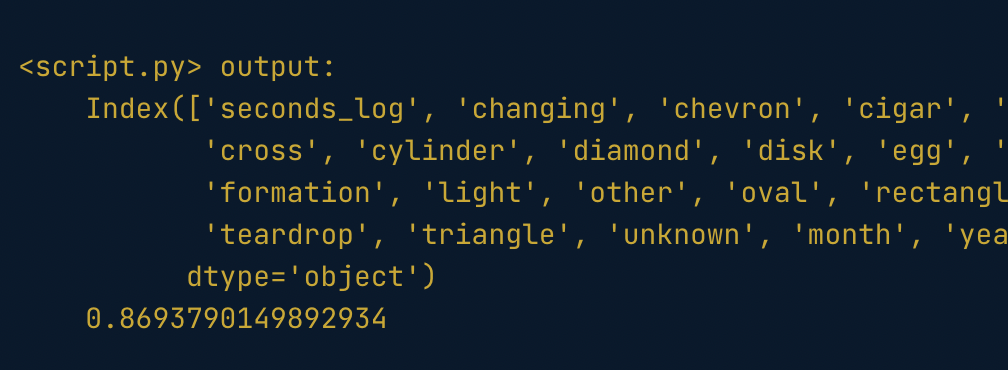

Modeling the UFO dataset, part 2

Finally, let's build a model using the text vector we created, desc_tfidf, using the filtered_words list to create a filtered text vector. Let's see if we can predict the type of the sighting based on the text. We'll use a Naive Bayes model for this.

Instructions

+ On the desc_tfidf vector, filter by passing a list of filtered_words into the index.
+ Split up the X and y sets using train_test_split(). Remember to convert filtered_text using toarray(). Pass the y set to the stratify= parameter, since we have imbalanced classes here.
+ Use the nb model's fit() to fit train_X and train_y.
+ Print out the .score() of the nb model on the test_X and test_y sets.

In [ ]:
# Use the list of filtered words we created to filter the text vector
filtered_text = desc_tfidf[:, list(filtered_words)]

# Split the X and y sets using train_test_split, setting stratify=y 
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# Fit nb to the training sets
nb.fit(train_X,train_y)

# Print the score of nb on the test sets
nb.score(test_X,test_y)

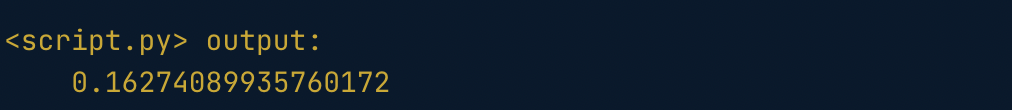

As you can see, this model performs very poorly on this text data. This is a clear case where iteration would be necessary to figure out what subset of text improves the model, and if perhaps any of the other features are useful in predicting type